# New House Sales 
Dataset of new, single-family house sals in the U.S. at the monthly level, divided into four regions: North-east, Mid-west, South and West. Source of this dataset is the The Survey of Construction by U.S. Census Bureau.  The purpose of the Survey of Construction is to provide current national and regional statistics on starts, completions, and characteristics of new, privately-owned single-family and multifamily housing units and on sales of new single-family houses. The United States code, Title 13, authorizes this survey and provides for voluntary responses. The Department of Housing and Urban Development partially funds this survey.

The Survey does not collect sales information for multifamily buildings or for existing homes.

## Coverage
New, privately-owned residential buildings currently authorized by a building permit or started in areas not requiring a building permit.

## Frequency
Data are available monthly and annually for housing starts since 1959, for new home sales since 1963, and for completions since 1968. Reported data are for building or sales activity taking place during the applicable reference period. Monthly data collection begins the first day after the reference month and continues through the 7th working day.

## Dataset Information
The extracted dataset contains new home singles at monthly level by four regions in the U.S. starting from January 1973 and ending in August 2023, the latest available month at the time of this data extraction. The values in the dataset represent number of housing units in thousands. 

In [26]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [27]:
dataset_name = "new_house_sales"

In [28]:
input_fname = "new_houses_sold_extracted.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [29]:
data = pd.read_csv(input_fname)
data.head()

,Period,Region,houses_sold_not_seas_adj,houses_sold_annualized_seas_adj
0,Jan 1973,North-east,7,127
1,Feb 1973,North-east,7,108
2,Mar 1973,North-east,9,103
3,Apr 1973,North-east,9,96
4,May 1973,North-east,9,90


# Prepare Data

In [30]:
series_col = "Region"
epoch_col = 'Period'
epoch_label = "Month_Num"
time_col = 'Period'
value_col = 'houses_sold_not_seas_adj'
exog_cols = ['houses_sold_annualized_seas_adj']

## Add Series Id

In [31]:
if series_col not in data:
    data.insert(0, series_col, 1)
data.head()

,Period,Region,houses_sold_not_seas_adj,houses_sold_annualized_seas_adj
0,Jan 1973,North-east,7,127
1,Feb 1973,North-east,7,108
2,Mar 1973,North-east,9,103
3,Apr 1973,North-east,9,96
4,May 1973,North-east,9,90


## Parse the 'Period' Column as DateTime

In [32]:
from datetime import datetime

# Function to convert "MMM YYYY" to "YYYY-MM-DD"
def convert_to_date_string(period):
    # Parse the date using datetime
    date_obj = datetime.strptime(period, '%b %Y')
    # Format the date as "YYYY-MM-DD" (using the first day of each month)
    return date_obj.strftime('%Y-%m-01')

# Apply the conversion function to the "Period" column
data[epoch_col] = data[epoch_col].apply(convert_to_date_string)

data.head()

,Period,Region,houses_sold_not_seas_adj,houses_sold_annualized_seas_adj
0,1973-01-01,North-east,7,127
1,1973-02-01,North-east,7,108
2,1973-03-01,North-east,9,103
3,1973-04-01,North-east,9,96
4,1973-05-01,North-east,9,90


In [33]:
data.tail()

,Period,Region,houses_sold_not_seas_adj,houses_sold_annualized_seas_adj
2427,2023-04-01,West,14,155
2428,2023-05-01,West,17,181
2429,2023-06-01,West,13,154
2430,2023-07-01,West,16,202
2431,2023-08-01,West,15,183


# Remove Covid Period

We will limit the data to end in December 2019 to avoid the unprecedented event of Covid starting March 2020. 

In [34]:
# To limit the data to end in December 1950, we'll filter the dataframe to only include rows up to that date.
end_date = '2019-12-01'  # Setting the cutoff date as December 1950

# Filter the data to include only rows up to the end_date
data = data[data[epoch_col] <= end_date]

# Display the last few rows to confirm the data ends in December 1950
data.tail()

,Period,Region,houses_sold_not_seas_adj,houses_sold_annualized_seas_adj
2383,2019-08-01,West,15,187
2384,2019-09-01,West,13,177
2385,2019-10-01,West,15,199
2386,2019-11-01,West,13,180
2387,2019-12-01,West,14,193


In [35]:
data['Period'].nunique()

564

# Visualize Data

In [36]:
date_range = pd.date_range(start=data['Period'].min(), end=data['Period'].max(), freq='AS-JAN')
date_range

DatetimeIndex(['1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

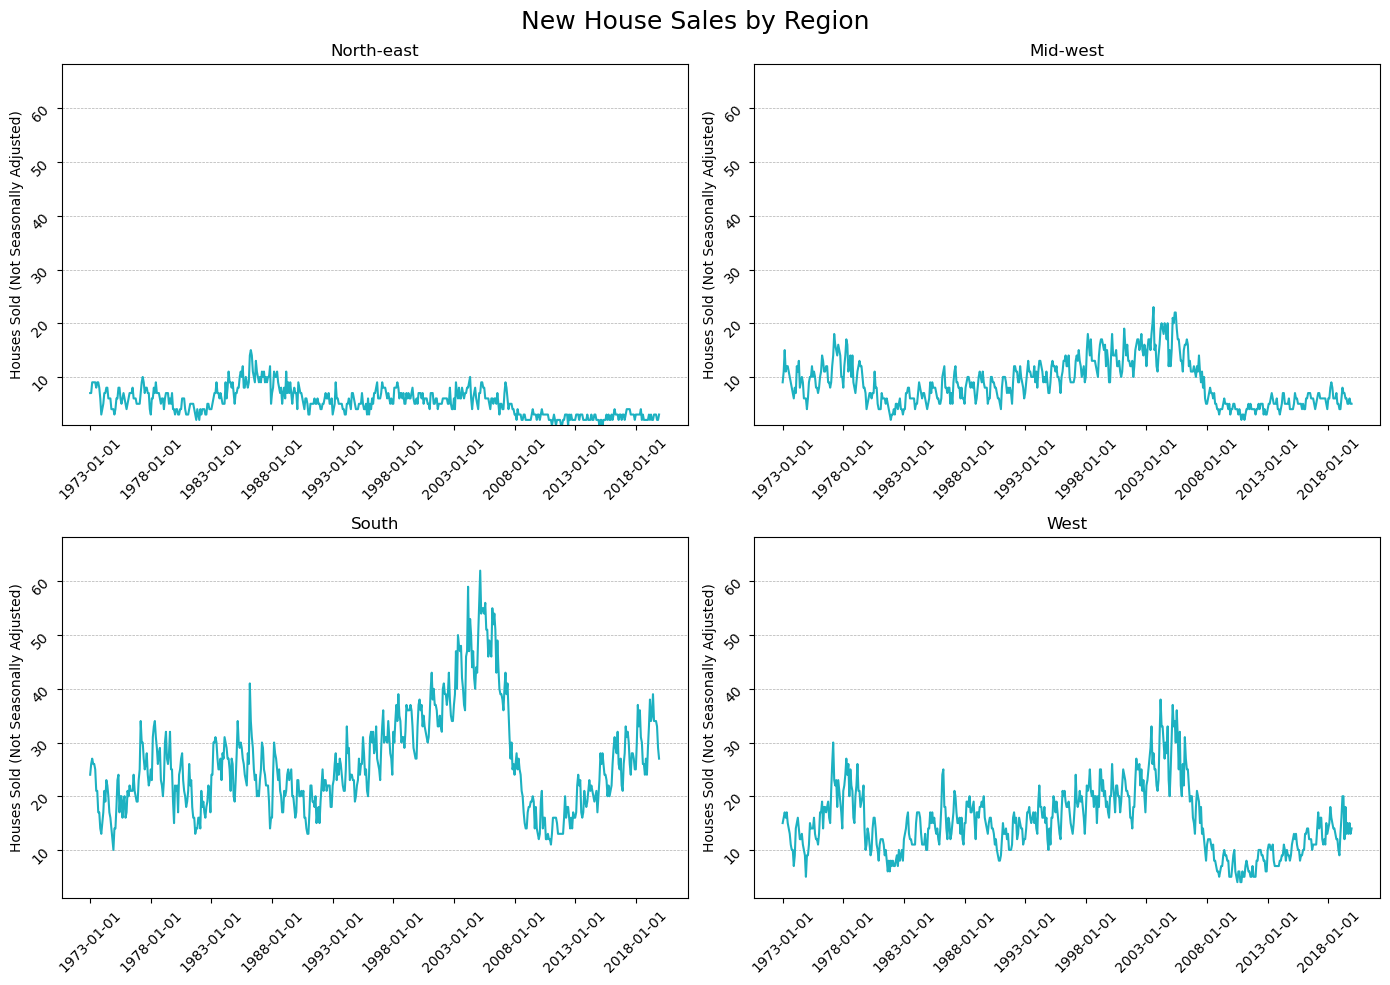

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# First, let's identify the unique regions in the 'Region' column
unique_regions = data['Region'].unique()

# Find the global maximum value across all regions for 'houses-sold-not-seas-adj' to set a common y-axis
global_max = data['houses_sold_not_seas_adj'].max()*1.1
global_min = data['houses_sold_not_seas_adj'].min()

# Create a 2x2 subplot for 'houses_sold_not_seas_adj' for each region
fig, axs = plt.subplots(2, 2, figsize=(14, 10))


# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Define the color for the plots
plot_color = '#1db1c1'

# Set x-ticks frequency 
date_range = pd.date_range(start=data['Period'].min(), end=data['Period'].max(), freq='5AS-JAN')
# Convert the date_range to the appropriate string format for the x-ticks
date_ticks = date_range.strftime('%Y-%m-%d').tolist()

for i, region in enumerate(unique_regions):
    # Filter the data for the current region
    region_data = data[data['Region'] == region]
    # Plot 'houses_sold_not_seas_adj' for the current region
    axs[i].plot(region_data['Period'], region_data['houses_sold_not_seas_adj'], color=plot_color)
    axs[i].set_title(region)
#     axs[i].set_xlabel('Year-Month')
    axs[i].set_ylabel('Houses Sold (Not Seasonally Adjusted)')
    axs[i].tick_params(labelrotation=45) # Rotate the labels for better readability
    axs[i].set_ylim(global_min, global_max)  # Set the same y-axis limits for all plots
    axs[i].set_xticks(date_ticks)  # Set x-ticks manually
    axs[i].grid(True, which='major', axis='y', linestyle='--', linewidth=0.5, zorder=0)


plt.suptitle("New House Sales by Region", fontsize=18)

# Adjust the layout to prevent overlap
plt.tight_layout()
# Save figure
plt.savefig(outp_fig_fname)
# Show the plots
plt.show()


# Save Main Data File

In [38]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)

data[all_cols].to_csv(outp_fname, index=False)